In [1]:
import numpy as np;
import pyalps.dwa;
from jupyterthemes import jtplot
import matplotlib.pyplot as plt 
%matplotlib inline
jtplot.style(theme='grade3',ticks=True, grid=True, figsize=(12, 7),context='poster',fscale=1.5, spines=True, gridlines='--')

In [2]:
def calU(V):      # in recoil energies
    wlen = np.array([1064, 1064.,1064.]);  # in nanometer
    a    = 103;                         # s-wave scattering length in bohr radius
    m    = 86.909;                            # mass in atomic mass unit
    L    = 201;                              # lattice size (along 1 direction)
    band = pyalps.dwa.bandstructure(V, wlen, a, m, L)
    result={}
    result['U']=band.U()
    result['t']=np.array(band.t())
    result['Ut']=result['U']/result['t']
    return result

CPU times: user 5.52 s, sys: 90.2 ms, total: 5.61 s
Wall time: 5.72 s


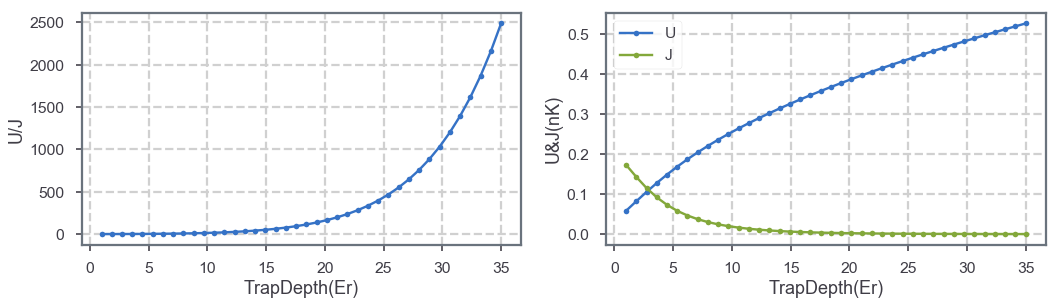

In [4]:
%%time

Uli=[]
tli=[]
Vz=18
s=np.linspace(1.0,35.0,40)
for i in s:
    V=np.array([i,i,Vz])
    result=calU(V)
    Uli.append(result['U'])
    tli.append(result['t'][0])
Uli=np.array(Uli)
tli=np.array(tli)
Ut=Uli/tli

fig=plt.figure(figsize=(15,8))
#fi.grid(True)
ax=fig.add_subplot(221)
ax.set_xlabel('TrapDepth(Er)')
ax.set_ylabel('U/J')
ax.plot(s,Ut,'.-')
ax=fig.add_subplot(222)
ax.set_xlabel('TrapDepth(Er)')
ax.set_ylabel('U&J(nK)')
ax.plot(s,Uli/100,'.-',label='U')
#ax=fig.add_subplot(223)
ax.plot(s,tli/100,'.-',label='J')
ax.legend(loc='best')
plt.tight_layout()

Calculate the lattice potential for phase transition point 

In [33]:
def findvforut(Vz,Ut=16.74):
    Vx=20
    V=np.array([Vx,Vx,Vz])
    error=(calU(V)['Ut'][0]-Ut)/Ut
    while np.abs(error)>0.00001:
#         print(error)
        Vx=Vx-error*3
        V=np.array([Vx,Vx,Vz])
        error=(calU(V)['Ut'][0]-Ut)/Ut
    print('Vx is %0.2f, Error is %0.2e, Ut is %0.10f'%(Vx,error,calU(V)['Ut'][0]))
    return Vx

Vz=59.
Vx_crt=findvforut(Vz,Ut=16.74)

Vx is 9.58, Error is -8.38e-06, Ut is 16.7398596411
